In [5]:
%%time
from main import *

CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 21.2 µs


In [8]:
%%time
uniform = stats.randint(low=-V_max_change, high=V_max_change+1)
#discret_uniform_distibution(a=-V_max_change, b=V_max_change)
binom = stats.binom(n = 2 * V_max_change, p = 0.5, loc = -V_max_change)
#discret_binom_distribution(a=-V_max_change, b=V_max_change)
model = GridModel(L_list=[L_i, L_e, L_b], P_i=P_i, P_e=P_e, P_b=P_b, U=U, O=O, V=V, B=B, V_max_change=V_max_change, distribution="binom")
grid_opt = GridOptimizer(model)

CPU times: user 2.66 ms, sys: 31 µs, total: 2.69 ms
Wall time: 2.71 ms


In [9]:
%%time
grid_opt.calculate_cost_to_go_matrix_sequence(depth = 5)

Calculating the cost to go matrix and the optimal decision matrix to the total depth of 5 from the depth 0.
Finished:                	 100.0%
CPU times: user 47.8 s, sys: 532 ms, total: 48.3 s
Wall time: 48.1 s


This grid model has following dimensions and assumptions:
       Control:	(-2, 2, 5)
        Consum:	(0, 10, 11)
        Output:	(0, 10, 11)
       Battery:	(0, 4, 5)
  Distribution:	<scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb6898b8af0>


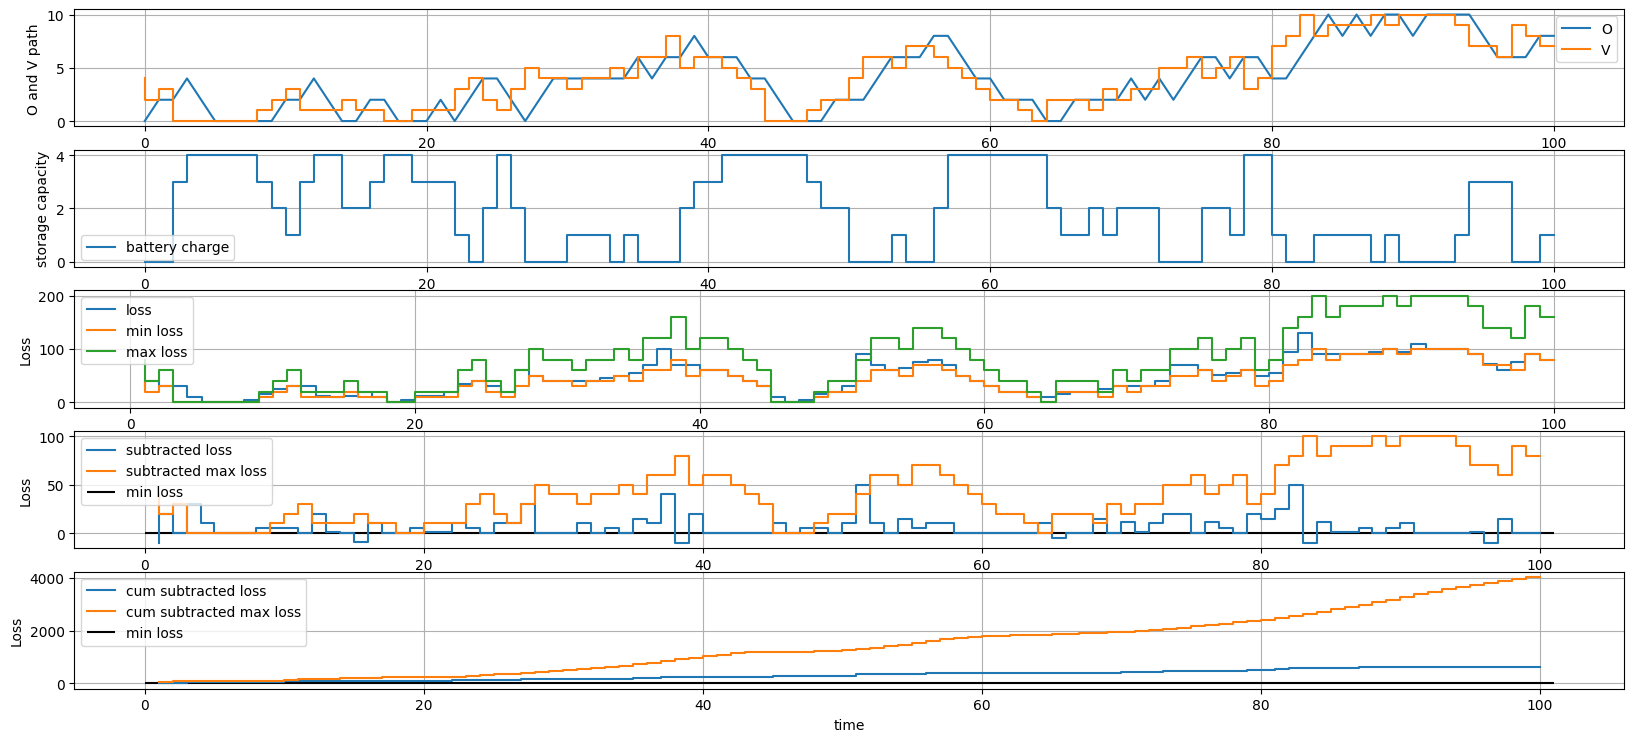

CPU times: user 1.14 s, sys: 58.7 ms, total: 1.2 s
Wall time: 987 ms


In [5]:
%%time
# simulate model
s = Simulator(model, grid_opt.opt_dec_m)
s.simulate(T=100)
s.plot_path()

In [2]:
import pandas as pd

In [30]:
df = pd.read_csv("./data/synPRO_el_family.dat", comment="#", sep=";")
df.index = pd.to_datetime(df['unixtimestamp'], unit='s', utc=True)

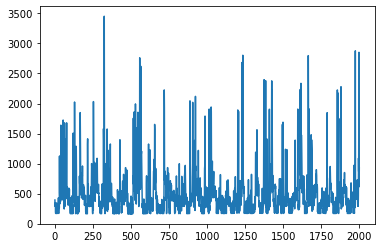

In [37]:
import matplotlib.pyplot as plt
plt.plot(list(df.P_el)[0:2000])

In [32]:
df

,YYYYMMDD,hhmmss,unixtimestamp,P_el
unixtimestamp,,,,
2020-12-31 23:00:00+00:00,20210101,0,1.609456e+09,391.930
2020-12-31 23:15:00+00:00,20210101,1500,1.609456e+09,287.969
2020-12-31 23:30:00+00:00,20210101,3000,1.609457e+09,313.770
2020-12-31 23:45:00+00:00,20210101,4500,1.609458e+09,343.733
2021-01-01 00:00:00+00:00,20210101,10000,1.609459e+09,197.872
...,...,...,...,...
2021-12-31 21:45:00+00:00,20211231,224500,1.640987e+09,286.951
2021-12-31 22:00:00+00:00,20211231,230000,1.640988e+09,405.301
2021-12-31 22:15:00+00:00,20211231,231500,1.640989e+09,455.934
